In [194]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import h5py

from sklearn import mixture
from sklearn import preprocessing

In [168]:
vals = []
cov = np.array([[0.1, 0.01], [0.01, 0.4]])
for loc in ((1, 1), (2, 3), (3, 5), (4, 1)):
    vals.append(np.random.multivariate_normal(loc, cov, size=1000)) 
vals.append(np.random.multivariate_normal([7, 3], 2 * cov, size=5000))
# vals.append(np.vstack([
#     np.random.uniform(-2, 10, size=500),
#     np.random.uniform(-1, 7, size=500)]).transpose())
data = np.vstack(vals)

In [169]:
[v.shape for v in vals]

[(1000, 2), (1000, 2), (1000, 2), (1000, 2), (5000, 2)]

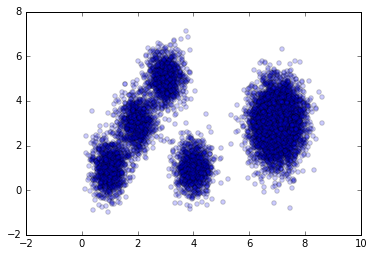

In [170]:
plt.scatter(*data.T, alpha=0.2)

In [171]:
clf = mixture.DPGMM(n_components=15, n_iter=100000)
clf.fit(data)

DPGMM(alpha=1.0, covariance_type='diag', init_params='wmc', min_covar=None,
   n_components=15, n_iter=100000, params='wmc', random_state=None,
   thresh=None, tol=0.001, verbose=0)

In [172]:
data.shape

(9000, 2)

In [173]:
clf.converged_

True

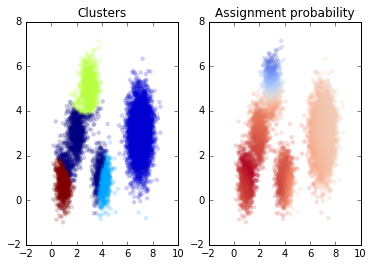

In [174]:
f, ax = plt.subplots(1, 2)
labels = clf.predict(data)
ax[0].scatter(*data.T, c=labels, lw=0, alpha=0.2)
ax[0].set_title('Clusters')

probs = clf.predict_proba(data) 
ax[1].scatter(*data.T, c=probs.max(axis=1),
            lw=0, alpha=0.2, cmap='coolwarm_r')
ax[1].set_title('Assignment probability')

In [184]:
import os
import rasterio
import h5py
import numpy
from sklearn import mixture

In [185]:
datasets = [os.path.join('datasets', f) 
            for f in os.listdir('datasets')
            if 'height' not in f 
            and f.endswith('tif')]
datasets

['datasets/Kaolin_Group_Index.tif',
 'datasets/MgOH_Group_Content.tif',
 'datasets/FeOH_Group_Content.tif',
 'datasets/Opaque_Index.tif',
 'datasets/AlOH_Group_Content.tif',
 'datasets/MgOH_Group_Composition.tif',
 'datasets/Ferrous_Iron_Content_in_MgOH.tif',
 'datasets/AlOH_Group_Composition.tif']

In [208]:
superpixels.shape

(12, 3600, 3600)

In [211]:
features.shape

(9, 3600, 3600)

In [234]:
nfeat = len(datasets)
with rasterio.open(datasets[0]) as src:
    width, height = src.meta['width'], src.meta['height']

aster_features = numpy.empty((nfeat, width, height))
with rasterio.drivers():
    for idx, dataset in enumerate(datasets):
        with rasterio.open(dataset) as src:
            features[idx] = src.read(1)
# 


In [ ]:
with h5py.File('height.hdf5') as fhandle:
    data = 

In [259]:
topo_features = \
    np.vstack([
        (slope['Raster'][0] < 0),
        (slope['Raster'][0] > 0),
        (curve['Raster'][0] < 0),
        (curve['Raster'][0] > 0)
    ])
features = topo_features
# features = numpy.vstack([aster_features, topo_features])

In [266]:
features.shape

(57600, 16)

In [260]:
features = features[:, ::15, ::15]
nfeat, width, height = features.shape
features = features.reshape(nfeat, width * height).transpose()

In [261]:
clf = mixture.DPGMM(n_components=30, alpha=0.01, n_iter=1000)

In [262]:
scaled = preprocessing.scale(features)
clf.fit(features)

/home/ubuntu/.local/conda/lib/python3.5/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype bool was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


DPGMM(alpha=0.01, covariance_type='diag', init_params='wmc', min_covar=None,
   n_components=30, n_iter=1000, params='wmc', random_state=None,
   thresh=None, tol=0.001, verbose=0)

In [263]:
clf.converged_

True

In [264]:
preds = clf.predict(features)

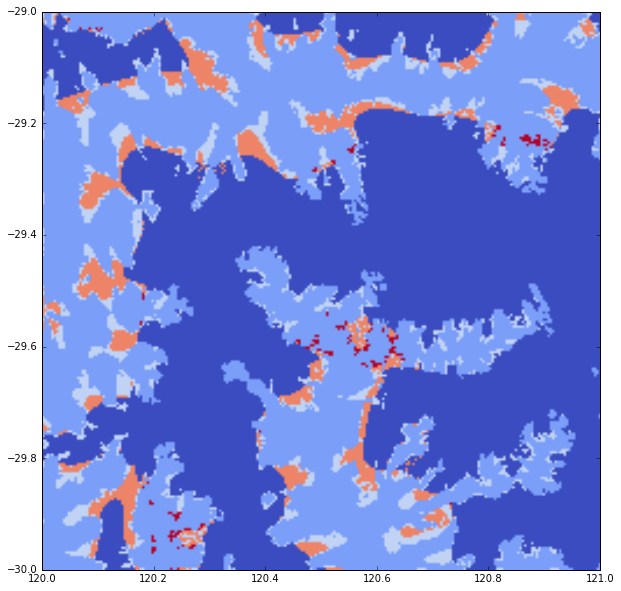

In [265]:
f, ax = plt.subplots(1, 1)
praster(preds.reshape(width, height))
f.set_size_inches(10, 10)

In [232]:
pred_prob = clf.predict_proba(features)

In [233]:
pred_prob.shape

(57600, 30)

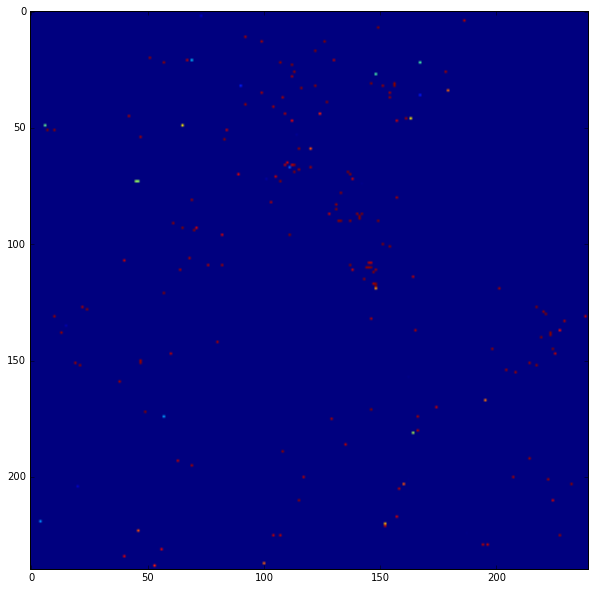

In [226]:
f, ax = plt.subplots(1, pred_prob.shape[1])
for idx in len(pred)
ax.imshow(pred_prob[:, 1].reshape(width, height))
f.set_size_inches(10, 10)

In [345]:
clf.means_.shape

(30, 8)

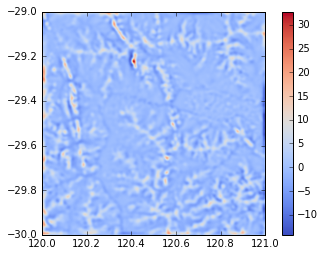

In [1]:
%matplotlib inline

import h5py
import matplotlib.pyplot as plt
import numpy as np

lower_left = (120, -30)
upper_right = (121, -29)
extent = (lower_left[0], upper_right[0], 
          lower_left[1], upper_right[1])
praster = lambda r, cmap=None: \
    plt.imshow(r[:, ::-1].transpose(), 
               cmap=cmap or 'coolwarm',
               extent=extent)

height = h5py.File('height_deriv_order0.hdf5')
slope = h5py.File('height_deriv_order1.hdf5')
curve = h5py.File('height_deriv_order2.hdf5')
praster(curve['Raster'][0, 1])
plt.colorbar()

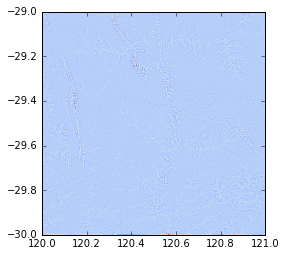

In [7]:
praster(curve['Raster'][0, 0])

In [202]:
result = np.logical_and(
    curve['Raster'][...] < 0,
    slope['Raster'][...] < 0)              

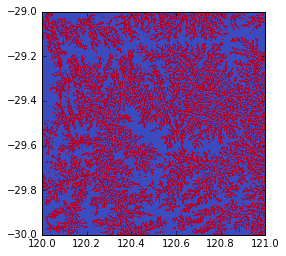

In [203]:
praster(result[0, 0])

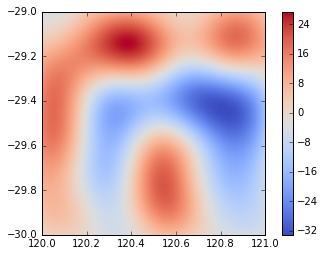

In [10]:
praster(curve['Raster'][0, 3])
plt.colorbar()

In [11]:
def binary_layers_to_int(raster):
    """ Conver binary layers to an integer
    """
    nlayers = raster.shape[0]
    return sum(2 ** s * raster[s] for s in range(nlayers))

In [13]:
height_median = np.median(height['Raster'][...])
superpixels = binary_layers_to_int( \
    np.vstack([
        (slope['Raster'][0, ...] > 0),
#         (height['Raster'][...] > height_median)[0],
        (curve['Raster'][0, ...] > 0)
    ]))

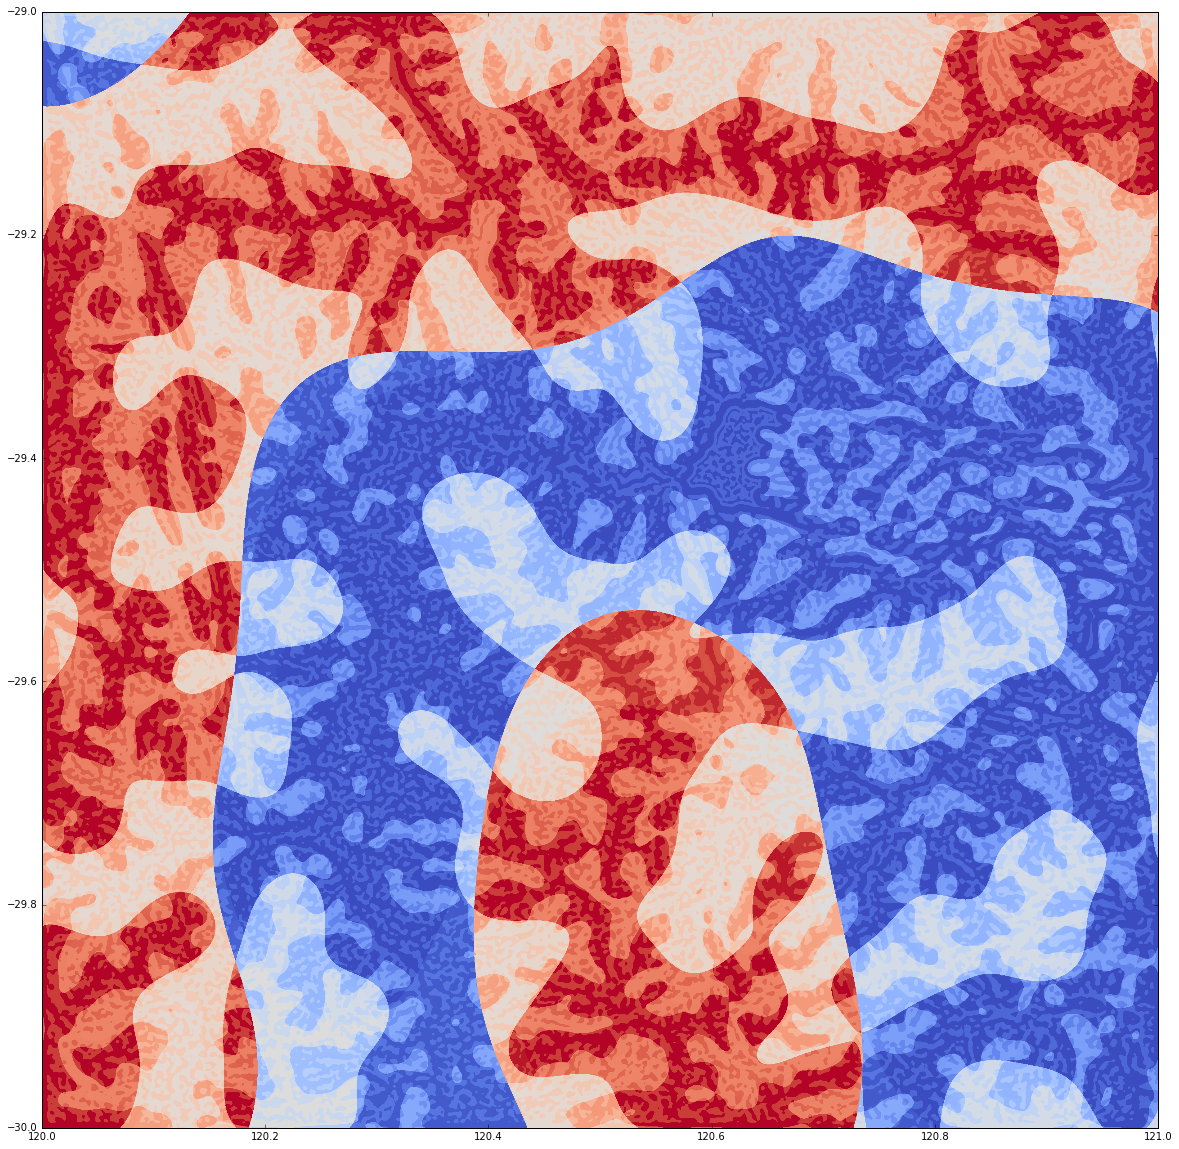

In [15]:
praster(superpixels)
plt.gcf().set_size_inches(20, 20)

In [90]:
labels = np.unique(superpixels)

In [91]:
labels

array([   0,    1,    2, ..., 4093, 4094, 4095])

In [99]:
(superpixels == 4095).shape

(3600, 3600)

In [141]:
from collections import defaultdict
stats = defaultdict(list)
nscales = 4
progbar = pyprind.ProgBar(len(labels) * nscales)
for label in labels:
    mask = superpixels == label
    for level in range(nscales):
        progbar.update()
        data = slope['Raster'][0, level][mask]
        stats['slope_{0}_std'.format(level)].append(np.std(data))
        data = curve['Raster'][0, level][mask]
        stats['curve_{0}_std'.format(level)].append(np.std(data))

0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 388.802 sec


In [142]:
features = np.vstack(list(height_stats.values())).transpose()

In [154]:
from sklearn import mixture

clf = mixture.DPGMM(alpha=0.1, n_components=15, n_iter=100000)

In [155]:
clf.fit(features)

DPGMM(alpha=0.1, covariance_type='diag', init_params='wmc', min_covar=None,
   n_components=15, n_iter=100000, params='wmc', random_state=None,
   thresh=None, tol=0.001, verbose=0)

In [156]:
clf.converged_

True

In [157]:
pred = clf.predict(features)

In [158]:
merging = np.empty(shape=superpixels.shape)
progbar = pyprind.ProgBar(len(labels))
for label, cluster in zip(labels, pred):
    progbar.update()
    merging[superpixels == label] = cluster

0%                          100%
[##############################] | ETA[sec]: 0.000 
Total time elapsed: 21.105 sec


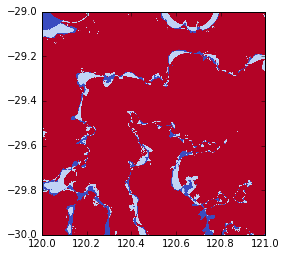

In [159]:
praster(merging)